In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import re
import pickle
import json
import sys
from IPython.display import display, clear_output
import csv
from datetime import datetime
import matplotlib.pyplot as plt

# import zipfile
# import os
# from urllib.request import urlretrieve
# import io
# from urllib.request import urlopen

In [2]:
url = "https://www.worldometers.info/geography/how-many-countries-in-europe/"
response = requests.get(url)

html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')

In [3]:
# Gets a list of country names for places I would like to analyse

countries = soup.find_all('a', {'class': "text-lime-600"})[3:-4] # Dont want russia, too big, not really a prospect
countries = [country.text for country in countries]
countryData = pd.DataFrame({"Country": countries})
# countryData

In [4]:
# for country in countries:
#     response =  requests.get(f"https://www.numbeo.com/cost-of-living/country_result.jsp?country={country}")

#     html_content = response.text

#     soup = BeautifulSoup(html_content, 'html.parser')

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:140.0) Gecko/20100101 Firefox/140.0"}

response =  requests.get(f"https://en.wikipedia.org/wiki/List_of_towns_and_cities_with_100,000_or_more_inhabitants/country:_A-B", headers=headers)

html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')


# countryData.iloc("Germany")["City"] = cities
# countryData


In [5]:
#Gets cities with populations over 100,000 as id like to focus on larger cities

urls = soup.find("div", {"style": "text-align: center;"}).find_all('a', href=True)

urls = [url["href"] for url in urls]

temp = pd.DataFrame({"Country": [], "Province": [],"City": [], "Pop.": []})
#temp["City"] = 

for country in countryData["Country"]:
    cityData = soup.find("h2", {"id": country})
    if cityData is None:
        continue
    cityData = cityData.find_next("tbody").find_all("td")
    cityData = [info.text.split('\n')[0] for info in cityData]
    for index in range(int(len(cityData)/3)):
        temp.loc[temp.shape[0]] = {"Country": country, "Province": cityData[index*3+1], "City": cityData[index*3], "Pop.": cityData[index*3+2]}
# temp

In [6]:
for url in urls:
    response =  requests.get(f"https://en.wikipedia.org/{url}", headers=headers)

    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')
    
    for country in countryData["Country"]:
        cityData = soup.find("h2", {"id": country})
        if cityData is None:
            continue
        cityData = cityData.find_next("tbody").find_all("td")
        cityData = [info.text.split('\n')[0] for info in cityData]
        for index in range(int(len(cityData)/3)):
            temp.loc[temp.shape[0]] = {"Country": country, "Province": cityData[index*3+1], "City": cityData[index*3], "Pop.": cityData[index*3+2]}
    time.sleep(3)
cityData = temp

In [7]:
cityData.to_csv("cities.csv", index=False)

In [7]:
response =  requests.get("https://www.iban.com/country-codes", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')


In [8]:
#Gets country abbreviations as for some websites, getting the abbreviations is necessary, as well as clarity 
#and simplicity.

temp = cityData.groupby("Country")
countryabrv = {}
for name, group in temp:
    try:
        countryabrv[name] = soup.find('td', string=name).find_next_sibling('td').text
    except:
        print(name)
countryabrv["Moldova"]= "MD"
countryabrv["Netherlands"]= "NL"

for index in range(len(cityData)):
    cityData.loc[index, "ABBR"] = countryabrv[cityData.loc[index, "Country"]]

# cityData

In [10]:
# for index in range(len(cityData)):
#     response =  requests.get("https://www.batchgeo.com/map/latitude-longitude", headers=headers)
#     html_content = response.text
#     soup = BeautifulSoup(html_content, 'html.parser')

#     print(soup.prettify(), )

#     #quard = soup.find('span', style= "white-space: nowrap; border:1px solid #e85151; padding:4px;").text
#     break

# response = requests.get("https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.901.zip", stream=True)
# with open("PLEASE.zip", mode="wb") as file:
#     file.write(response.content)

In [11]:
# os.makedirs("PLEASE", exist_ok=True)

# with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
#     zip_ref.extractall("downloaded_content")



# url = "https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.901.zip"

# response = requests.get(url)

# html_content = response.text
# soup = BeautifulSoup(html_content, 'html.parser')
# soup.prettify()


# z = zipfile.ZipFile(io.BytesIO(response.content))
# z.extractall()

# print(f"Extracted files: {z.namelist()}")

# # Step 2: Load the data
# print("\nLoading data...")
# df = pd.read_csv('worldcities.csv')

In [12]:
# https://www.expatistan.com/robots.txt
# https://www.coli.org/
# https://meteostat.net/en/place/cz/prague?s=11520&t=2022-01-01/2022-01-01
# https://open-meteo.com/en/docs/historical-weather-api?hourly=temperature_2m,rain,precipitation,snowfall,snow_depth,cloud_cover&daily=temperature_2m_max,temperature_2m_min,daylight_duration,precipitation_sum&start_date=2021-10-21&location_mode=bounding_box&bounding_box=-90,-180,90,180

In [13]:
# table = soup.find("div", role="rowgroup")
# table
#Gets longitude and latitude in order to get weather data and to possibly map out by location later

# for index in range(len(cityData)):
#     response = requests.get(f"https://latitudelongitude.org/{cityData.loc[index, "ABBR"].lower()}/{cityData.loc[index, "City"].lower()}")
#     html_content = response.text
#     soup = BeautifulSoup(html_content, 'html.parser')

#     test = soup.find('h2')
#     if test.text[:4] == "List":
#         print(soup.find_all('a'))
#         #response = requests.get(test.find_next('a')["href"])
#         html_content = response.text
#         soup = BeautifulSoup(html_content, 'html.parser')

#     #coord = soup.find('span')["text"]
#     break

# soup.prettify()
# print(soup.prettify())
# print(f"{cityData.loc[0, "City"]}, {cityData.loc[0, "Country"]}")


##Figure this out 

# Failed attempt at getting latitude and longitude

[<a href="/"><img src="/images/logo.gif"/></a>, <a name="thetop"></a>, <a href="/">Start</a>, <a href="/be/">Belgium</a>, <a href="/">Home</a>, <a href="/about">About</a>, <a href="/popular">Popular</a>, <a href="#tools">Tools</a>, <a href="https://www.facebook.com/sharer/sharer.php?u=http://latitudelongitude.org/be/anderlecht" target="_blank"><img height="32" src="/images/fb.gif" width="32"/></a>, <a href="http://twitter.com/home?status=http://latitudelongitude.org/be/anderlecht" target="_blank"><img height="32" src="/images/tw.gif" width="32"/></a>, <a href="http://www.linkedin.com/shareArticle?mini=true&amp;url=http://latitudelongitude.org/be/anderlecht&amp;title=Latitude%20Longitude%20/BE/ANDERLECHT" target="_blank"><img height="32" src="/images/in.gif" width="32"/></a>, <a href="https://plus.google.com/share?url=http://latitudelongitude.org/be/anderlecht" target="_blank"><img height="32" src="/images/g1.gif" width="32"/></a>, <a href="#thetop">⇑TOP⇑</a>, <a name="tools"></a>, <a h

In [9]:
# For the url search to work I need all accents umlauts etc to be standardized into english alphabet
normalizer = {
    'ő': 'o',
    'è': 'e',
    'î': 'i',
    'ç': 'c',
    'ä': 'a',
    'ü': 'u',
    'é': 'e',
    'á': 'a',
    'ñ': 'n',
    'ă': 'a',
    'ę': 'e',
    'ą': 'a',
    'ł': 'l',
    'ź': 'z',
    'š': 's',
    'ę': 'e',
    'ó': 'o',
    'ö': 'o',
    'í': 'i',
    'ś': 's',
    'ń': 'n',
    'â': 'a',
    'å': 'a',
    'ë': 'e',
    'ș': 's',
    'ì': 'i',
}

In [10]:
# Gets living data like price and cost of living

count = 0
cityData["Total COL"] = 0
cityData["Rent"] = 0
cityData["Sal"] = 0
cityData["QOL"] = 0


for index in range(len(cityData)):
    cityNorm = '-'.join(cityData.loc[index, "City"].lower().split(" "))
    for index2 in range(len(cityNorm)):
        if normalizer.get(cityNorm[index2]) != None:
            cityNorm = cityNorm[:index2] + normalizer.get(cityNorm[index2]) + cityNorm[index2+1:]
    try:
        response = requests.get(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityNorm}/", headers=headers)
        response.raise_for_status()
    except:
        # print(response.content)
        count += 1
        print(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityNorm}/")
        time.sleep(2)
        continue


    time.sleep(2)

    
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    table = soup.find('table').find_all('span')
    
    cityData.loc[index, "Total COL"] = int(table[1].text[1:])
    try:
        cityData.loc[index, "Rent"] = int(table[11].text[1:])
    except:
        cityData.loc[index, "Rent"] = int(float(table[11].text[1:]))
    cityData.loc[index, "Sal"] = int(table[26].text[1:])

    
    cityData.loc[index, "QOL"] = int(soup.find('td', headers="quality").text.replace(' ', '').replace("'", ''))

# count
# cityData

In [11]:
cityData = pd.read_csv("cities.csv")

response = requests.get(f"https://en.wikipedia.org/wiki/Regions_of_France", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

    

In [12]:
# Some cities need province abbreviation to be searched so we add that for the cities that need them

cityData["Prov. ABBR"] = ""

needed = soup.find('h2', string="List of administrative regions")

needed = needed.find_next('tbody')


for index, row in cityData[cityData["Country"] == "France"].iterrows():
    temp = needed.find('a', title=re.compile(row["Province"]))
    if temp == None:
        print(row["Province"])
        continue
    cityData.loc[index, "Prov. ABBR"] = temp.find_parent('tr').find_all('td')[3].text.split('-')[1].split("\n")[0]

cityData.to_csv("cities.csv", index=False)

In [13]:
cityData = pd.read_csv("cities.csv")

response = requests.get(f"https://en.wikipedia.org/wiki/Regions_of_Germany", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')


In [14]:
needed = soup.find('h3', id="List")

needed = needed.find_next('tbody')


for index, row in cityData[cityData["Country"] == "Germany"].iterrows():
    temp = needed.find('a', title=re.compile(row["Province"]))
    if temp == None:
        print(row["Province"])
        continue

    cityData.loc[index, "Prov. ABBR"] = temp.find_parent('tr').find_all('td')[1].text.replace(' ', '').split("\n")[0]

In [15]:
cityData.to_csv("cities.csv", index=False)

In [16]:
cityData = pd.read_csv("cities.csv")

response = requests.get(f"https://en.wikipedia.org/wiki/Provinces_of_Italy", headers=headers)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

In [55]:
needed = soup.find('h3', id="List")

needed = needed.find_next('tbody')


for index, row in cityData[cityData["Country"] == "Italy"].iterrows():
    cityData.loc[index, "Prov. ABBR"] = row['Province'][0:2].upper()
    # temp = needed.find('a', title=re.compile(row["City"]))
    # if temp == None:
    #     print(row["Province"])
    #     continue
    # print(temp.find_parent('tr').find_all('td')[3].text)
    # break

    # cityData.loc[index, "Prov. ABBR"] = temp.previous_sibling().text.replace(' ', '').split("\n")[0]

In [17]:
# Not all province abbreviation was perfect as its not standardized accross everywhere
# so I manually fix the ones that needed to be fixed

for index, row in cityData[cityData["Country"] == "Italy"].iterrows():
    if cityData.loc[index, "Prov. ABBR"] == 'EM':
        cityData.loc[index, "Prov. ABBR"] = 'ER'
    if cityData.loc[index, "Province"] == 'Trentino-Alto Adige/Südtirol':
        cityData.loc[index, "Prov. ABBR"] = 'TT'
    if cityData.loc[index, "Province"] == 'Lazio':
        cityData.loc[index, "Prov. ABBR"] = 'LZ'
    if cityData.loc[index, "Province"] == 'Friuli-Venezia Giulia':
        cityData.loc[index, "Prov. ABBR"] = 'FG'
    if cityData.loc[index, "Province"] == 'Campania':
        cityData.loc[index, "Prov. ABBR"] = 'CM'

In [19]:
for index, row in cityData[(cityData["Country"] == "Germany") & (cityData["Prov. ABBR"].notnull())].iterrows():
    if row["City"] == "Berlin":
        cityData.loc[index, "Prov. ABBR"] = "BB"
    if row["Province"] == "Saxony":
        cityData.loc[index, "Prov. ABBR"] = "SN"

In [86]:
cityData.to_csv("cities.csv", index=False)

In [3]:
cityData = pd.read_csv("cities.csv")

In [20]:
# Input missing data 

for index, row in cityData[(cityData["Rent"] == 0) & (cityData['Prov. ABBR'].notnull())].iterrows():
    cityNorm = '-'.join(cityData.loc[index, "City"].lower().split(" "))
    for index2 in range(len(cityNorm)):
        if normalizer.get(cityNorm[index2]) != None:
            cityNorm = cityNorm[:index2] + normalizer.get(cityNorm[index2]) + cityNorm[index2+1:]
    try:
        response = requests.get(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityData.loc[index, "Prov. ABBR"].lower()}/{cityNorm}/", headers=headers)
        response.raise_for_status()
    except:
        # print(response.content)
        print(f"https://livingcost.org/cost/{cityData.loc[index, "Country"].lower()}/{cityData.loc[index, "Prov. ABBR"].lower()}/{cityNorm}/")
        time.sleep(2)
        continue


    time.sleep(2)

    
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    table = soup.find('table').find_all('span')
    
    cityData.loc[index, "Total COL"] = int(table[1].text[1:])
    try:
        cityData.loc[index, "Rent"] = int(table[11].text[1:])
    except:
        cityData.loc[index, "Rent"] = int(float(table[11].text[1:]))
    cityData.loc[index, "Sal"] = int(table[26].text[1:])

    
    cityData.loc[index, "QOL"] = int(soup.find('td', headers="quality").text.replace(' ', '').replace("'", ''))


In [21]:
cityData = cityData[cityData['Rent'] != 0]

In [22]:
cityData.to_csv("cities.csv", index=False)

In [23]:
cityData.shape[0]

439

In [26]:
cityData["Lat"] = 0.0
cityData["Long"] = 0.0

In [ ]:
# Gets long and lat by city

for index, row in cityData.iterrows():
    params = {
        'q': f"{row["City"]}, {row["Country"]}",
        'format': 'json',
        'limit': 1
    }
    
    response = requests.get('https://nominatim.openstreetmap.org/search', params=params, headers={'User-Agent': 'WeatherDataScript/1.0'})
    # Max of one request per second, must use a valid user agent
    # Credit to OpenStreetMap
    
    
    if response.status_code == 200:
        data = response.json()
        if data:
            result = data[0]
            cityData.loc[index, "Lat"] = float(result['lat'])
            cityData.loc[index, "Long"] = float(result['lon'])
    else:
        print(response)
    time.sleep(3)
    cityData.to_csv("citiesLoc.csv", index=False)

In [27]:
cityData.head()

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR,Lat,Long
0,Belgium,Brussels,Anderlecht,"125,883",BE,1033,1889,3040,76,NaN,0.0,0.0
1,Belgium,Flanders,Antwerp,"542,417",BE,909,1818,2918,91,NaN,0.0,0.0
2,Belgium,Flanders,Bruges,"119,748",BE,1005,1868,2486,82,NaN,0.0,0.0
3,Belgium,Brussels,Brussels,"195,546",BE,1133,2028,3458,91,NaN,0.0,0.0
4,Belgium,Wallonia,Charleroi,"203,950",BE,928,1718,2345,87,NaN,0.0,0.0


In [113]:
cityData.to_csv("citiesLoc.csv", index=False)

In [ ]:
cities.shape

In [217]:
#DO NOT RUN THIS

# Creates needed variables like the dictionary. If this is run then all data is erased and needs to be rescraped

# cityTemps = pd.read_csv("citiesLoc.csv")

# weatherDict = {}
# lastInput = {"lastIndex": 0}
# with open("lastInput.json", "w") as f:
#     json.dump(lastInput, f)

In [28]:
cityTemps = pd.read_csv("citiesLoc.csv")

In [3]:
batchSize = 100 #Size of the batch requested from the site. You get penelized less for larger batches but you 
# can typically only get one batch a day due to constraints

In [4]:
with open('lastInput.json', 'r') as file:
    lastIndex = json.load(file)['lastIndex']
lastIndex

#Finds the last index input as to not rescrape or rewrite data

438

In [5]:
# https://open-meteo.com/en/terms open meteo terms
with open("weatherDict.pkl", 'rb') as f:
    weatherDict = pickle.load(f)

with open('lastInput.json', 'r') as file:
    lastIndex = json.load(file)['lastIndex'] + 1

for i in range(lastIndex, len(cityTemps), batchSize):
    #Getting 8 requests is most efficient in terms of api calls, though because of the daily limit, getting all the data will likely take days
    lats = cityTemps.iloc[i : i + batchSize]["Lat"].tolist()
    longs = cityTemps.iloc[i : i + batchSize]["Long"].tolist()

    if i+batchSize > len(cityTemps):
        lats = cityTemps.iloc[i:]["Lat"].tolist()
        longs = cityTemps.iloc[i:]["Long"].tolist()
    else:
        lats = cityTemps.iloc[i : i + batchSize]["Lat"].tolist()
        longs = cityTemps.iloc[i : i + batchSize]["Long"].tolist()
    
    params = {
        'latitude': lats,
        'longitude': longs,
        "start_date": "2022-11-07",
    	"end_date": "2025-11-06",
        "daily": ["weather_code", "temperature_2m_mean", "temperature_2m_max", "temperature_2m_min", "wind_speed_10m_max", "rain_sum", "snowfall_sum", "precipitation_hours", "daylight_duration"],
        'timezone': 'auto'
    }
    
    responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
    
    while responses.status_code == 429:
        print("Waiting 2 minutes\nIndex: ", i)
        time.sleep(120)
        responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
        while responses.status_code == 429:home
            clear_output(wait=True)
            print("Waiting 20 minutes\nIndex: ", i)
            time.sleep(600)
            print("10 Minutes elapsed")
            time.sleep(600)
            responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
            clear_output(wait=True)
            count = 1
            ##if
            while responses.status_code == 429:
                print("Waiting an Hour and 10 Minutes\nIndex: ", i)
                time.sleep(1200)
                print("20 Minutes elapsed")
                time.sleep(1200)
                print("20 Minutes elapsed")
                time.sleep(1200)
                print("20 Minutes elapsed")
                time.sleep(600)
                print("Attempting to Continue")
                responses = requests.get("https://archive-api.open-meteo.com/v1/archive", params=params)
                clear_output(wait=True)
                print(f"Attempt: {count} of an hour and ten minutes. Batchsize: {batchSize}")
                if responses.status_code == 429:
                    print("Daily rate limit most likely exceeded.\nEnding program")
                    sys.exit()

        print("Resumed")
        
    
    if responses.status_code == 200:
            data = responses.json()
            print()
            for index in range(len(data)):
                # print(cityTemps.loc[index + i, "City"], " Index: ", index + i, " Coords: ", data[index]["latitude"], " " , data[index]["longitude"])
                weatherDict[(cityTemps.loc[index + i, "City"], cityTemps.loc[index + i, "ABBR"])] = pd.DataFrame(data[index]['daily'])
                # print(place["latitude"], " " , place["longitude"])
                # df = pd.DataFrame(response)
                lastInput = {"lastIndex": i+index}
                with open("lastInput.json", "w") as f:
                    json.dump(lastInput, f)
            clear_output(wait=True)
            print(f"--> Batch {i/batchSize} of {cityTemps.shape[0]/batchSize} is input.")
                
    else:
        print(responses.status_code, " ", i)
        
    with open('weatherDict.pkl', 'wb') as f:
        pickle.dump(weatherDict, f)
    time.sleep(60)

--> Batch 3.5 of 4.39 is input.


In [7]:
len(weatherDict)
# len(weatherDict.keys())
# weatherDict[("Neuss", "DE")]
# weatherDict[("Münster", "DE")]

439

In [4]:
with open("weatherDict.pkl", 'rb') as f:
    weatherDict = pickle.load(f)# cityTemps.iloc[0 : 0 + 8]["Lat"].tolist()
# temp

In [5]:
# Makes weathercode easier to understand

weatherCode = {
    0: "Clear Sky",
    1: "Mainly Clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog" ,
    48: "Fog With Light Freezing",
    51: "Light Drizzle",
    52: "Moderate Drizzle",
    53: "Dense Drizzle",
    61: "Light Rain",
    62: "Moderate Rain",
    63: "Heavy Rain",
    95: "Slight Thunderstorm",
    96: "Moderate Thunderstorm",
    99: "Thunderstorm w/ Hail",
}

In [ ]:
# cityTemps.iloc[149]

# The weather data is extremely comprehensive, I may still use more later but for now I input weather facts i would like to know
# into the data frame, and average out the weather to be per season rather than by day by year.

cityAdd = pd.DataFrame(cityTemps)
cityAdd["Snow Days/Y"] = 0.0
cityAdd["Snow Fall/Y"] = 0.0
cityAdd["Total Temps Ave"] = 0.0
cityAdd["Summer Temps Ave"] = 0.0
cityAdd["Spring Temps Ave"] = 0.0
cityAdd["Winter Temps Ave"] = 0.0
cityAdd["Fall Temps Ave"] = 0.0

cityAdd["Highest 3 Year"] = 0.0
cityAdd["Lowest 3 Year"] = 0.0

cityAdd["Most Days"] = ""

cityAdd["Sunny Days/Y"] = 0.0

cityAdd["Hours Rained/Y"] = 0.0

cityAdd["Winter Daylight"] = 0.0

for index, row in cityAdd[:len(weatherDict)].iterrows():
    weath = weatherDict.get((row["City"], row["ABBR"]))
    snowdays = weath[weath['snowfall_sum']>0]
    cityAdd.loc[index, "Snow Days/Y"] = snowdays.shape[0]/3
    cityAdd.loc[index, "Snow Fall/Y"] = snowdays["snowfall_sum"].sum()/3

    cityAdd.loc[index, "Total Temps Ave"] = weath["temperature_2m_mean"].mean()

    weath["time"] = pd.to_datetime(weath["time"])
    # , errors='coerce'
    
    target = "9-1"
    start = datetime.strptime(target, "%m-%d")
    target = "12-1"
    end = datetime.strptime(target, "%m-%d")
    
    fall = weath[(weath["time"].dt.month >= start.month) & (weath["time"].dt.month < end.month)]
    
    target = "12-1"
    start = datetime.strptime(target, "%m-%d")
    target = "3-1"
    end = datetime.strptime(target, "%m-%d")
    
    winter = weath[(weath["time"].dt.month == start.month) | (weath["time"].dt.month < end.month)]
    
    target = "3-1"
    start = datetime.strptime(target, "%m-%d")
    target = "6-1"
    end = datetime.strptime(target, "%m-%d")
    
    spring = weath[(weath["time"].dt.month >= start.month) & (weath["time"].dt.month < end.month)]
    
    target = "6-1"
    start = datetime.strptime(target, "%m-%d")
    target = "9-1"
    end = datetime.strptime(target, "%m-%d")
    
    summer = weath[(weath["time"].dt.month >= start.month) & (weath["time"].dt.month < end.month)]

    cityAdd.loc[index, "Summer Temps Ave"] = summer["temperature_2m_mean"].mean()
    cityAdd.loc[index, "Spring Temps Ave"] = spring["temperature_2m_mean"].mean()
    cityAdd.loc[index, "Winter Temps Ave"] = winter["temperature_2m_mean"].mean()
    cityAdd.loc[index, "Fall Temps Ave"] = fall["temperature_2m_mean"].mean()

    cityAdd.loc[index, "Highest 3 Year"] = winter["temperature_2m_max"].max()
    cityAdd.loc[index, "Lowest 3 Year"] = fall["temperature_2m_min"].min()   

    # weath.loc[weath["weather_code"] == 2, ['weather_code']] +=1 

    # print(weath["weather_code"].value_counts())

    cityAdd.loc[index, "Most Days"] = weatherCode[weath["weather_code"].mode()[0]] 

    cityAdd.loc[index, "Sunny Days/Y"] = len(weath[weath["weather_code"] == 0])/3

    cityAdd.loc[index, "Hours Rained/Y"] = weath["precipitation_hours"].sum()/3

    cityAdd.loc[index, "Winter Daylight"] = (winter["daylight_duration"].mean()/60)/60

cityAdd

In [10]:
cityAdd[0:len(weatherDict)].to_csv("citiesWWeather.csv", index=False)

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR,...,Summer Temps Ave,Spring Temps Ave,Winter Temps Ave,Fall Temps Ave,Highest 3 Year,Lowest 3 Year,Most Days,Sunny Days/Y,Hours Rained/Y,Winter Daylight
429,Ukraine,Zaporizhzhia Oblast,Melitopol,"150,768",UA,265,545,428,39,NaN,...,24.698913,12.087681,1.864576,13.137363,15.4,-2.9,Overcast,25.000000,886.0,9.283219
433,Ukraine,Luhansk Oblast,Sievierodonetsk,"101,135",UA,331,633,425,39,NaN,...,23.075725,11.322101,-1.076753,11.261905,13.3,-11.6,Overcast,18.666667,1069.0,9.054728


In [29]:
cityAdd = pd.read_csv("citiesWWeather.csv")

In [11]:
# cityAdd[cityAdd["Summer Temps Ave"] == cityAdd["Summer Temps Ave"].max()]
# I got so much data and wanted to analyze it, might do something with this, im unsure
# Ben score is a very roughly weighted approximation of factors I would like or dislike combined into a single
# score

cityAdd["Ben Score"] = 0

avSpending = abs(cityAdd["Sal"].mean()-cityAdd["Total COL"].mean())

for index, row in cityAdd.iterrows():
    score = int(
        row["QOL"]*150
        -max(row["Snow Days/Y"] - 30, 30 - row["Snow Days/Y"])*120
        -((abs(row["Sal"]-row["Total COL"])-avSpending)/avSpending)*1500
        -(row["Rent"]/row["Sal"])*1000
        +row["Sunny Days/Y"]*50
        - (cityAdd["Winter Daylight"].max() - row["Winter Daylight"])*50
        -row["Hours Rained/Y"]/3
        # -abs(max(0, row["Summer Temps Ave"]-30)) * 3 #maybe add column for hot days
    )
    cityAdd.loc[index, "Ben Score"] = score

cityAdd.iloc[0:len(weatherDict)].sort_values("Ben Score", ascending = False).head(10)
# cityAdd.iloc[0:len(weatherDict)].sort_values("Ben Score", ascending = False).tail(10)
# cityAdd["Winter Daylight"].max()
# cityAdd.iloc[0:len(weatherDict)].sort_values("Ben Score", ascending = False).to_csv("fun.csv", index=False)

,Country,Province,City,Pop.,ABBR,Rent,Total COL,Sal,QOL,Prov. ABBR,...,Spring Temps Ave,Winter Temps Ave,Fall Temps Ave,Highest 3 Year,Lowest 3 Year,Most Days,Sunny Days/Y,Hours Rained/Y,Winter Daylight,Ben Score
98,Germany,Berlin,Berlin,"3,520,000",DE,1217,2222,3412,96,BB,...,10.555072,3.000000,11.446520,16.5,-7.9,Overcast,10.666667,1422.333333,8.609688,13189
125,Germany,Lower Saxony,Hanover,"532,200",DE,891,1828,2914,93,NI,...,10.401812,3.875646,11.710989,17.2,-4.7,Overcast,9.666667,1714.000000,8.628823,12675
137,Germany,Saxony,Leipzig,"560,500",DE,856,1690,3010,92,SN,...,10.472826,3.400369,11.729670,17.3,-5.5,Overcast,12.000000,1463.333333,8.767729,12523
31,Bulgaria,Sofia City,Sofia,"1,280,334",BG,629,1244,1061,78,NaN,...,10.910145,2.726937,12.623077,19.6,-5.6,Overcast,28.333333,1007.666667,9.677714,12499
220,Greece,Crete,Heraklion,"145,440",GR,613,1256,1108,74,NaN,...,17.434783,13.400000,21.090842,24.7,8.7,Overcast,86.666667,767.000000,10.253025,12428
302,Spain,Community of Madrid,Madrid,"3,332,035",ES,1177,2015,2580,92,NaN,...,14.044928,6.730627,15.889011,20.6,0.5,Overcast,38.333333,847.333333,9.874059,12396
362,Poland,Lower Silesian,Wrocław,"674,132",PL,977,1592,1688,79,NaN,...,10.432246,2.677860,11.064469,15.7,-6.4,Overcast,10.666667,1447.666667,8.794580,12348
123,Germany,Hamburg,Hamburg,"1,747,400",DE,1127,2172,3668,95,HH,...,10.021377,3.521771,11.202930,15.6,-4.8,Overcast,7.000000,1798.000000,8.471364,12330
119,Germany,North Rhine-Westphalia,Gelsenkirchen,"260,400",DE,726,1506,2335,91,NW,...,10.959058,4.666421,12.374725,16.6,-3.8,Overcast,9.333333,2033.000000,8.749660,12285
128,Germany,North Rhine-Westphalia,Herne,"155,900",DE,844,1631,2191,89,NW,...,10.825725,4.499631,12.176557,16.5,-4.8,Overcast,8.333333,2022.000000,8.740577,12278


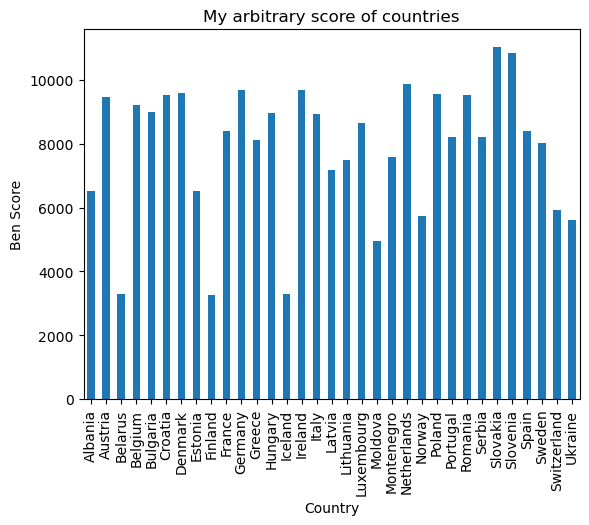

In [23]:
# cityAdd = pd.read_csv("fun.csv")
# for data in responses:
#     daily_data = data.Daily()
#     print(data["latitude"], " " , data["longitude"])
#                 # df = pd.DataFrame(response)
# print(weatherDict.get(("Nuremburg", "DE")))
# type(responses)
# data = responses.json()
# type(data)
# data[0]['daily']
# cityAdd[cityAdd["Sunny Days/Y"]==cityAdd["Sunny Days/Y"].max()]
countryBen = cityAdd.groupby("Country")["Ben Score"].mean()
countryBen.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Ben Score')
plt.title('My arbitrary score of countries')
plt.show()

In [ ]:
target = "8-2-2022"
start = datetime.strptime(target, "%m-%d-%Y")
# target = "6-1"
# end = datetime.strptime(target, "%m-%d")

fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for index, row in cityAdd["Country"].iterrows():
    data = weatherDict()
    for x in range(5):
        for y in range(5):
            deltaN = x*y